# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [5]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [6]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column. 
- First, we need to **replace the ? with np.nan**.

In [7]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [8]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

### **Question 1:** 
- **Check the summary statistics of the data (use the describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [10]:
# Write your code here

data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Observations:________**

All columns have 398 observations. There is a really wide range in the columns for horsepower as well as mpg and weight. This is to be expected when we look at the different types of cars. Curious to se the relationship between mpg and model year

### **Let's check the distribution and outliers for each column in the data**

### **Question 2:**
- **Create histograms to check the distribution of all the variables (use .hist() attribute) (2 Marks)**
- **Create boxplots to visualize the outliers for all the variables (use sns.boxplot()) (2 Marks)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


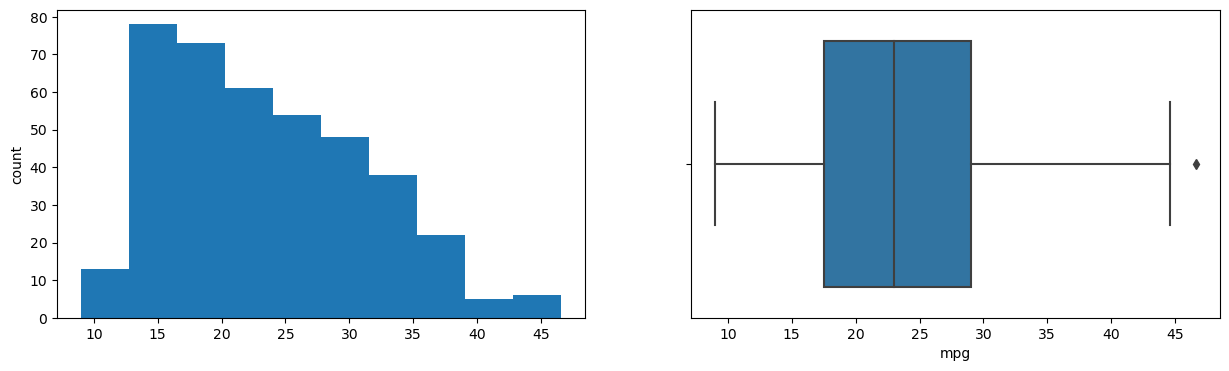

cylinders
Skew : 0.53


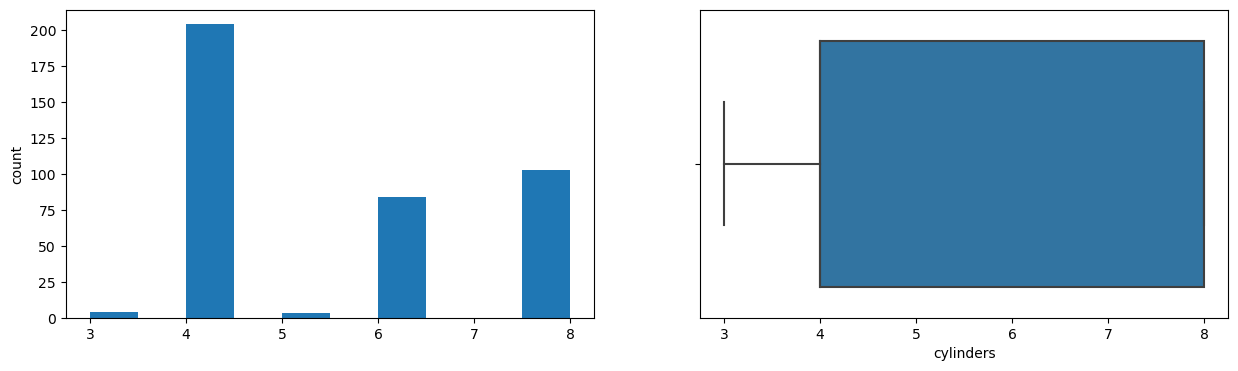

displacement
Skew : 0.72


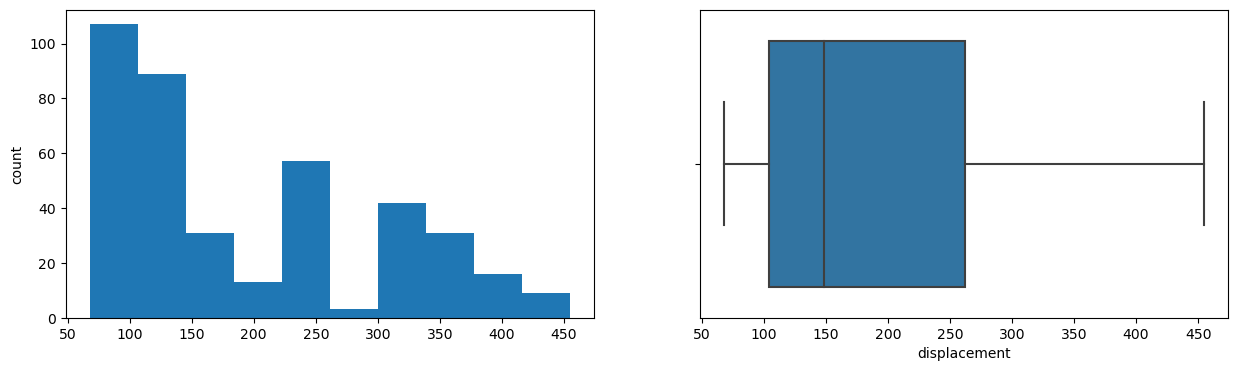

horsepower
Skew : 1.11


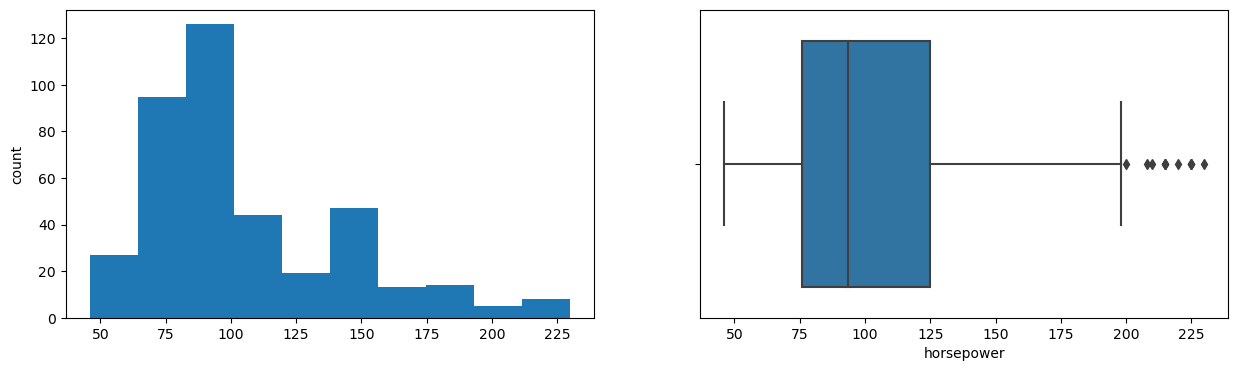

weight
Skew : 0.53


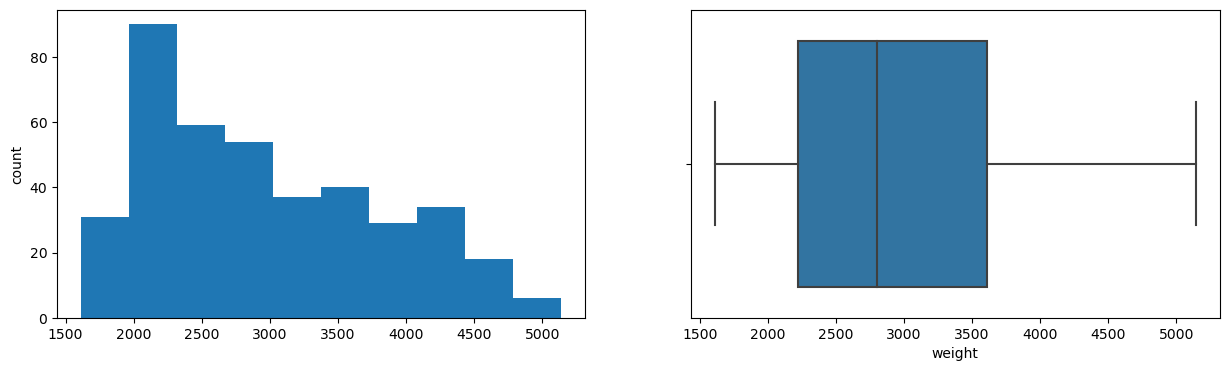

acceleration
Skew : 0.28


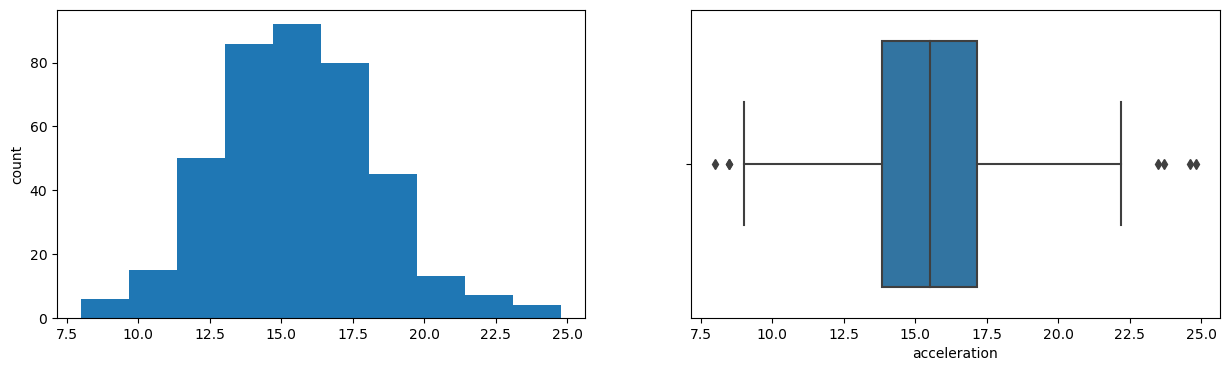

model year
Skew : 0.01


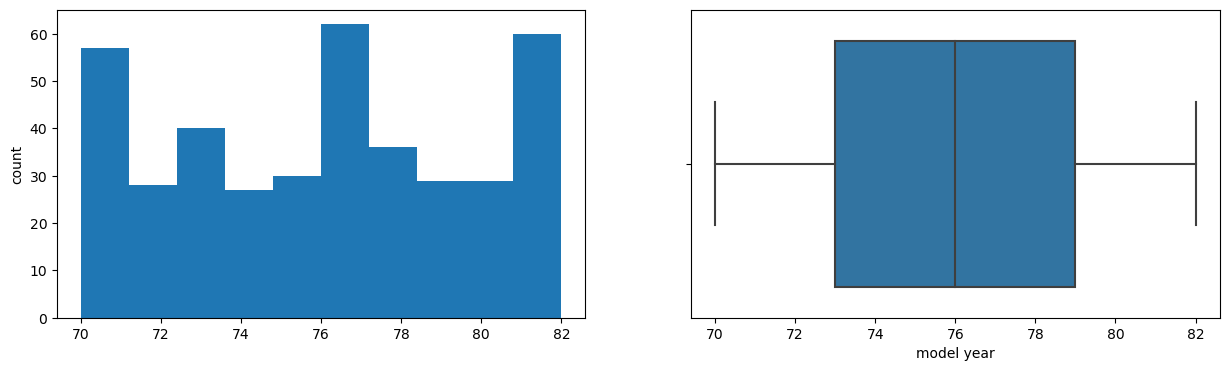

In [25]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins=10, grid=False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:_____________**

Mpg is skewed right with Q2 being evenly distributed between Q1 and Q3. 

The majority of the vehicles in the data set have 4 cylinders and no outliers obviously. 

Displacement is skewed right and even though its top whisker goes all the way to 450 the average is 150 due to the high count at 100. 

Horsepower has a few outliers and is right skewed

Weight is right skewed with no outliers. 

Acceleration shows the most normal distribution with a few outliers on both ends. 

The box plot for model year suggests normal distribution but the histogram shows high counts at both ends. 

### **Checking the correlation**

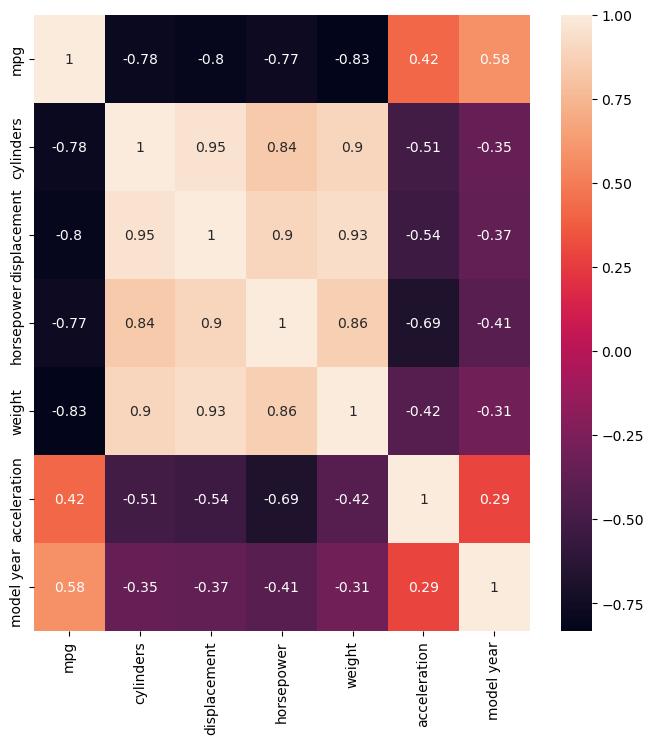

In [21]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [22]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [23]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

### **Question 3:**

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data (2 Marks)**
- **Write your observations on the variance explained by the principal components (2 Marks)**

In [32]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)  # Apply the PCA algorithm with random_state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

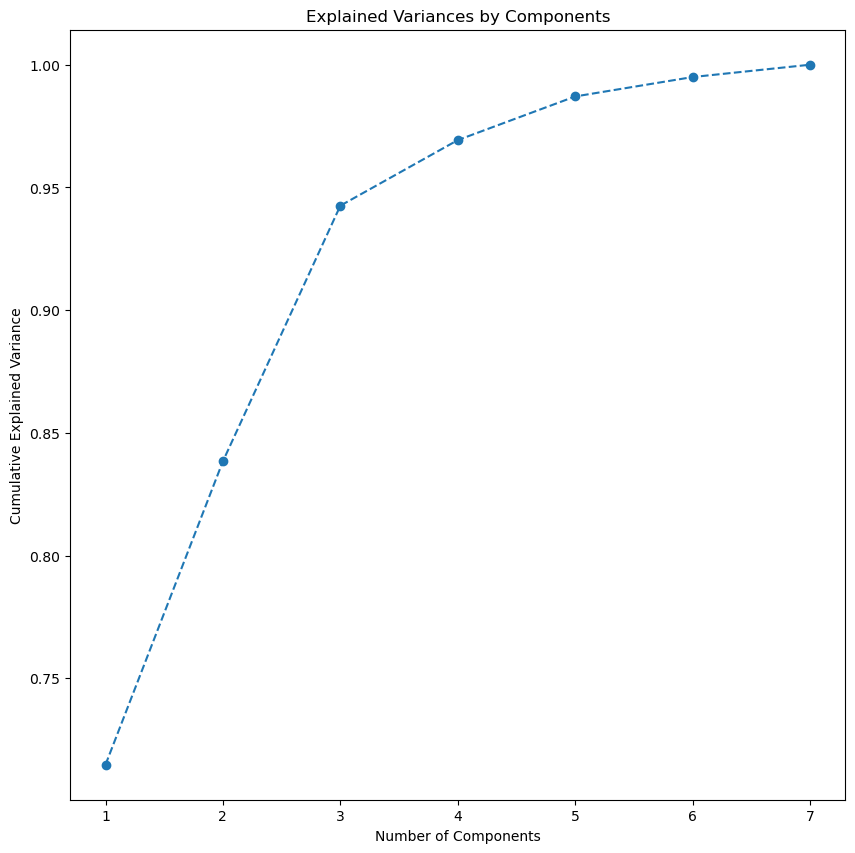

In [33]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

To reduce the high dimensionality of the data we need to decide how many components should be retained without
taking too many. The first three components will explain about 94% of the variance and the first four components
will explain about 97% of the variance. 

In [34]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:___________________**

If we are looking for the least number of components that will explain at least 90% of the data then the answer
is 3 which makes sense according to the graph that we made above.


In [36]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


### **Question 4: Interpret the coefficients of the first three principal components from the below DataFrame (4 Marks)**

In [37]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:__________________**

These 3 components show us 90% of the variability. These are 3 new features. PC1, PC2, and PC3 is a combination of all the numbers in the row below it. PC1 looks be related to cylinders, displacement, horsepower, and weight. PC2 is related to model year. PC3 is related to acceleration. The numbers in blue show the highest coefficients, the positive correlation. The pink numbers show the lowest coefficients, the negative correlation. 

#### We can also visualize the data in 2 dimensions using the first two principal components 

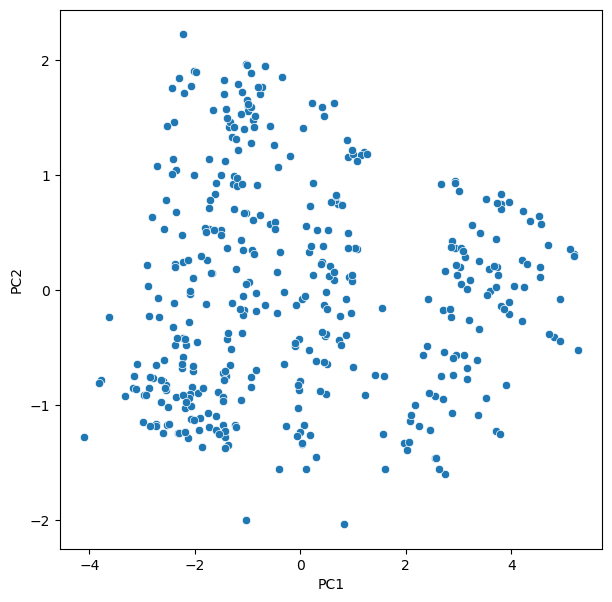

In [52]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue to the scatter plot**

### **Question 5:** 

- **Create a scatter plot for the first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**
- **Hint:** concatenate the DataFrames 'data_pca1' and 'data' on axis = 1

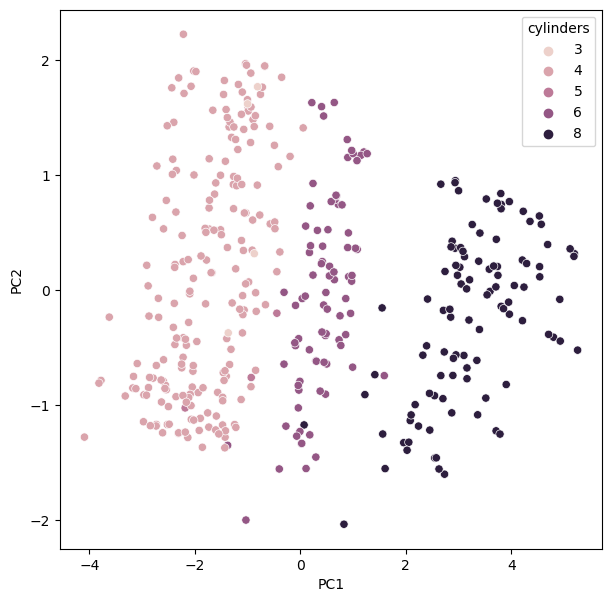

In [62]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))


sns.scatterplot(x = df_concat[0], y = df_concat[1], data = df_concat, hue = 'cylinders')
  # Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:___________**

We can see where the data has been divided to make the three groups. There is still some overlap which could be resolved with scaling. The two components that we are looking at capture the majority of the explained variance and reduce dimesionality effectively.  

## t-SNE

### **Question 6:** 
- **Apply the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (use random_state = 1) (3 Marks)**
- **Write your observations (2 Marks)**   

In [72]:
tsne= TSNE(n_components = 2, random_state = 1)
          # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)   # Fit and transform t-SNE function on the scaled data

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [73]:
data_tsne.shape

(398, 2)

In [74]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [75]:
data_tsne.head()

,Component 1,Component 2
0,-23.104227,-30.228313
1,-24.950542,-29.500071
2,-24.119961,-30.136980
3,-23.673611,-29.754570
4,-23.841228,-30.443615


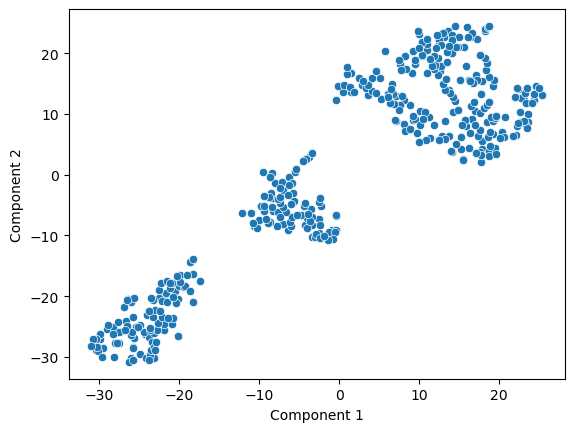

In [76]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

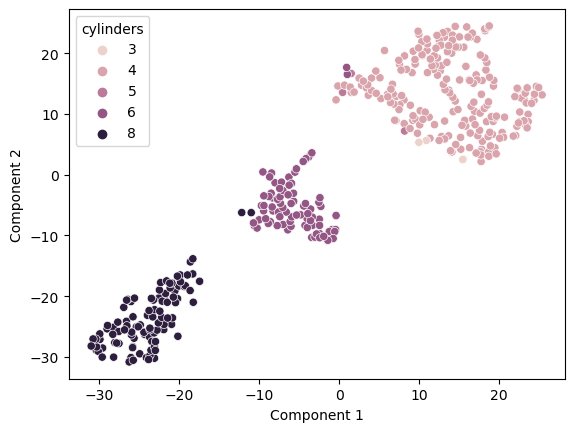

In [77]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Observations:______________**

We can clearly see three groups in the data after scaling them. Now that we have three distinct groups without the overlap we can visualize their properties. 

In [78]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    
    else: 
        return 'group_3'

In [79]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

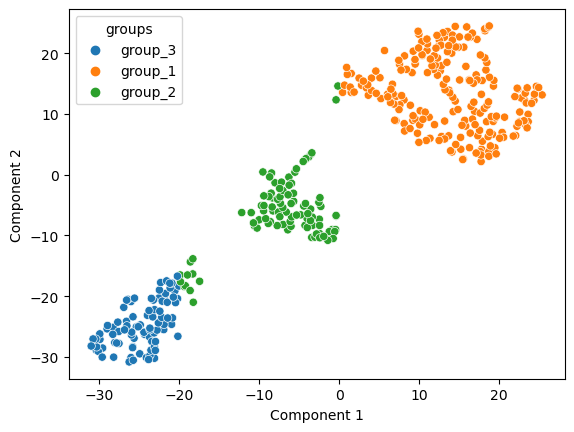

In [80]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [81]:
data['groups'] = data_tsne['groups'] 

### **Question 7:** 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (3 Marks)**

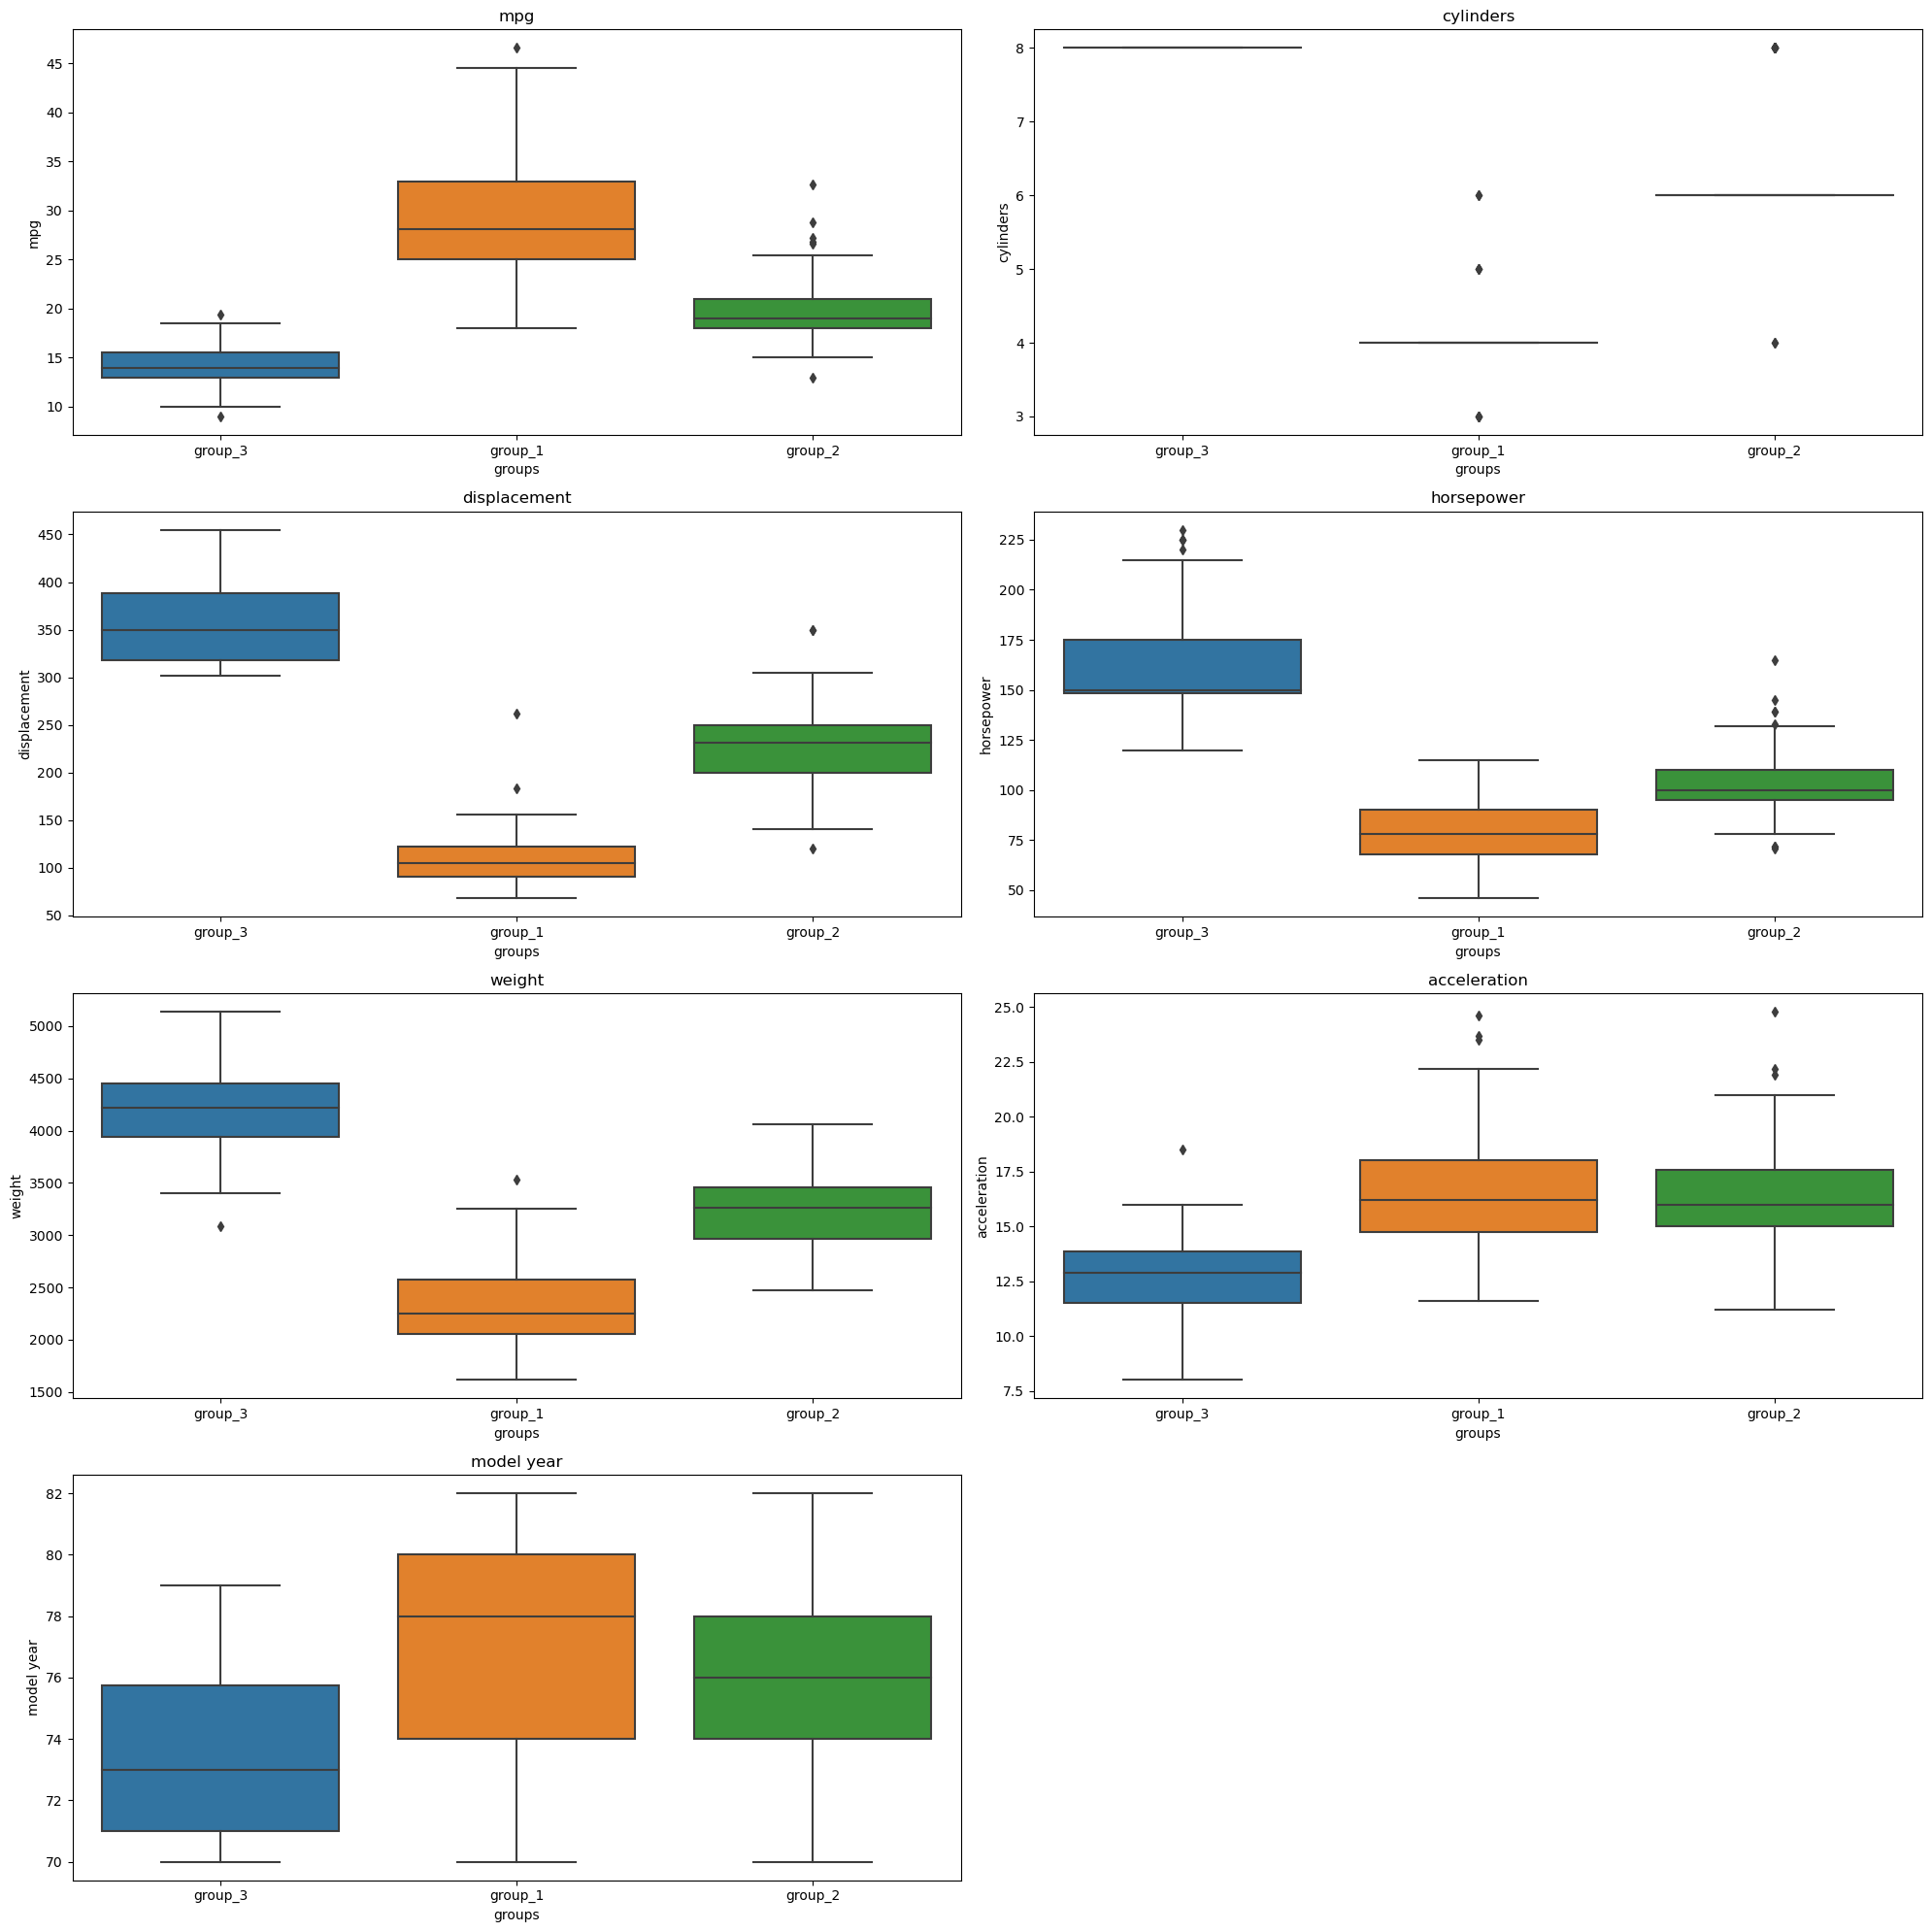

In [84]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    
    sns.boxplot(y=data[variable], x=data['groups'])
    
    # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:___________**

There are three groups in the data represtenting three different groups of vehicles. 

Group 1 has higher mpg, 4 cylinders, and less displacement, horsepower and weight. This group also represents the newest models of cars the average year being 1978 and has the highest acceleration but not by much. 

Group 2 falls in the middle tier with mpg (with a few outliers), displacement, horsepower, weight and acceleration is only just lower than group 1 (again with outliers). They are 6 cylinder vehicles with an average model year of 1976. 

Group 3 gets the lowest mpg which makes sense as they are 8 cylinder vehicles. They have the highest horsepower, displacement and weight with the lowest acceleration and an average model year of 1973. 

